In [1]:
import torch
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import glob
import csv
import json
import ast
import re
def get_dict1(files, stat=None):
    if stat is None:
        stat = collections.defaultdict(list)
    for file_name in files:
        name = file_name.split('/training_log.txt')[0]
        with open(file_name) as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines]
        if not stat[name]:
            stat[name] = collections.defaultdict(list)
        i = 0

        while i < len(lines):
            if "step: " in lines[i]:
                for j in range(i,len(lines)):#range(22):
                    try:
                        step = float(lines[j].split('00:')[0].split('step:')[-1].strip())*100
                        get_dic = json.loads(json.dumps(ast.literal_eval(lines[j].split('00:')[-1].strip())))
                        for name_in in get_dic.keys():
                            stat[name][name_in].append([step,float(get_dic[name_in])])
                    except:
                        pass
                i += j
            else:
                i += 1
    return stat
def figure(stat, names, index,key=''):
    fig,ax1s = plt.subplots(1,3,figsize=(int(1.3*6*3),int(1.3*6)),sharey=True) 
    fig.tight_layout()
    for name,ax1 in zip(names, ax1s):
        print ()
        xy = np.array(stat[key][name])
        x, y = xy[:,0], xy[:,1]
        ax1.plot(x,y, 'o-',label=name)
        ax1.set_title("metric: %s with %3f"%(name,max(y)), fontsize = 20,)
        ax1.legend(prop={'size': 20},)
        for label in (ax1.get_xticklabels()):    
            label.set_fontsize(20)
        for label in (ax1.get_yticklabels()):    
            label.set_fontsize(20)

        ax1.set_xlabel('epoch', fontsize = 20,)
        if index!=0:
            ax1.set_yscale('log')
        ax1.set_ylabel(name, color='black', fontsize = 20)
        ax1.grid(color='b', linestyle='--', linewidth=0.68)
    plt.show()

In [2]:
file_name = '/home/xiaoxiawu/MLPruning/training/result/e/1.0/training_log.txt'
files = [file_name, ]
stat = get_dict1(files)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

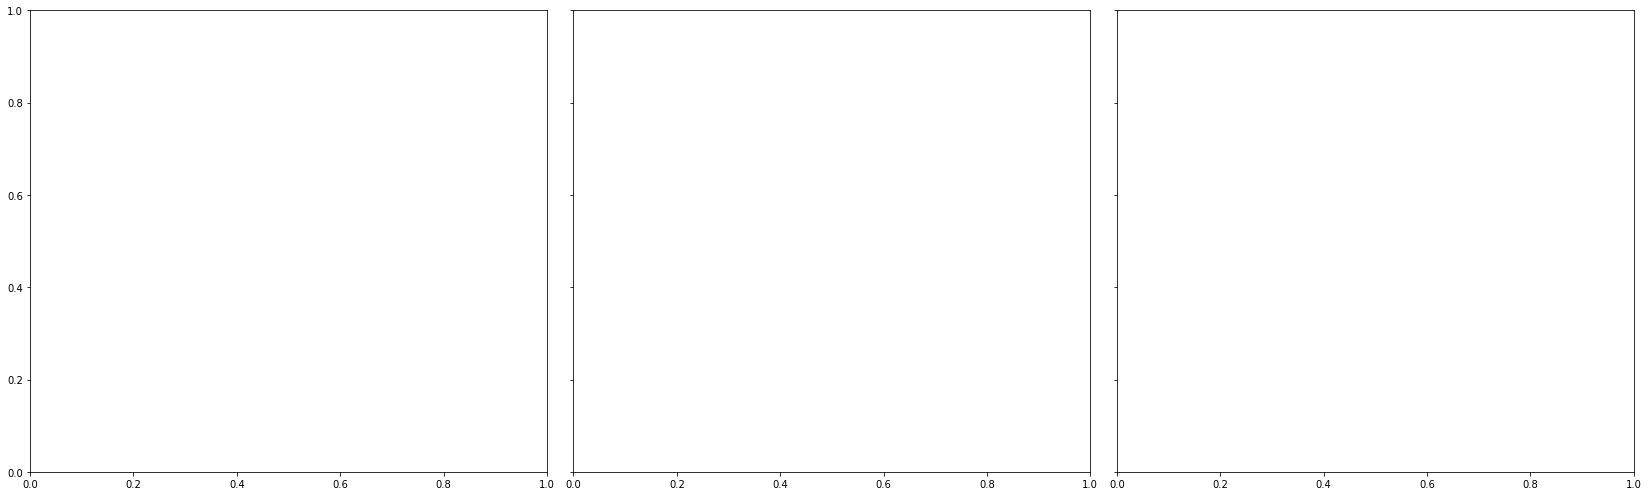

In [3]:
names11 = ['eval_acc', 'eval_f1', 'eval_acc_and_f1', 'learning_rate', 'learning_rate/1',  'loss']
for index, names1 in enumerate([names11[:3],names11[3:] ]):
    figure(stat, names1,index,key='/home/xiaoxiawu/MLPruning/training/result/e/1.0')